In [2]:
!pip install PennyLane

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.6 MB/s eta 0:00:00


In [3]:
import pennylane as qml
import numpy as np

# Codercise I.13.1

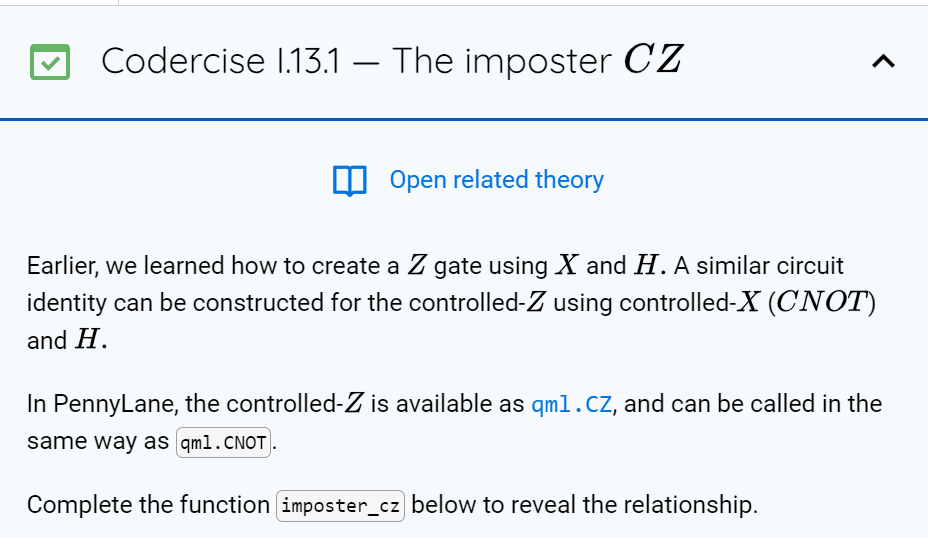

## Learnt about the Controlled-Z operation and implement using a set of Hadamard and CNOT gates

In [ ]:
dev = qml.device("default.qubit", wires=2)

# Prepare a two-qubit state; change up the angles if you like
phi, theta, omega = 1.2, 2.3, 3.4


@qml.qnode(device=dev)
def true_cz(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE REGULAR CZ GATE HERE
    qml.CZ(wires=[0,1])
    return qml.state()


@qml.qnode(dev)
def imposter_cz(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT CZ USING ONLY H AND CNOT
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0,1])
    qml.Hadamard(wires=1)

    return qml.state()


print(f"True CZ output state {true_cz(phi, theta, omega)}")
print(f"Imposter CZ output state {imposter_cz(phi, theta, omega)}")

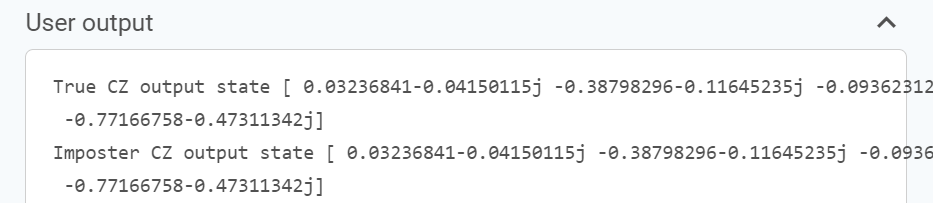

# Codercise I.13.2

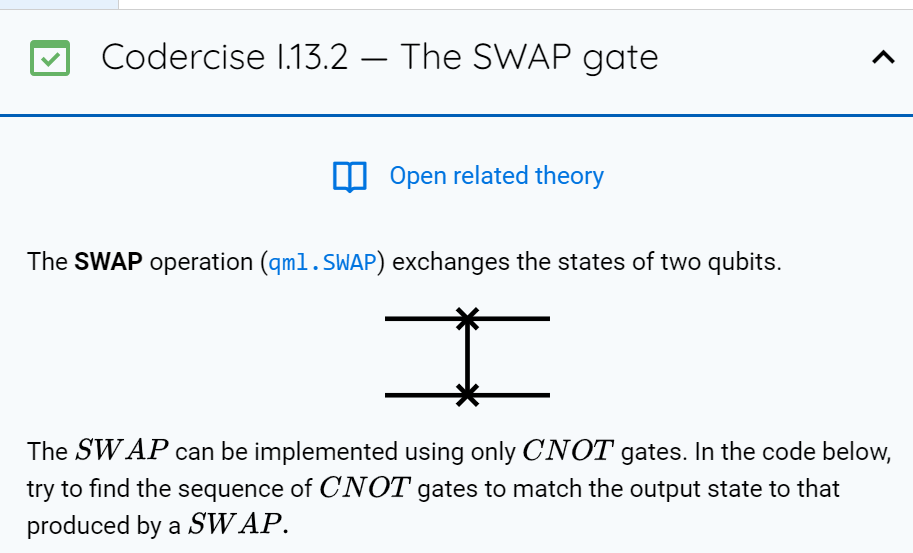

In [6]:
dev = qml.device("default.qubit", wires=2)

# Prepare a two-qubit state; change up the angles if you like
phi, theta, omega = 1.2, 2.3, 3.4


@qml.qnode(dev)
def apply_swap(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE REGULAR SWAP GATE HERE
    qml.SWAP(wires=[0,1])
    return qml.state()


@qml.qnode(dev)
def apply_swap_with_cnots(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE SWAP GATE USING A SEQUENCE OF CNOTS
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[1,0])
    qml.CNOT(wires=[0,1])

    return qml.state()


print(f"Regular SWAP state = {apply_swap(phi, theta, omega)}")
print(f"CNOT SWAP state = {apply_swap_with_cnots(phi, theta, omega)}")

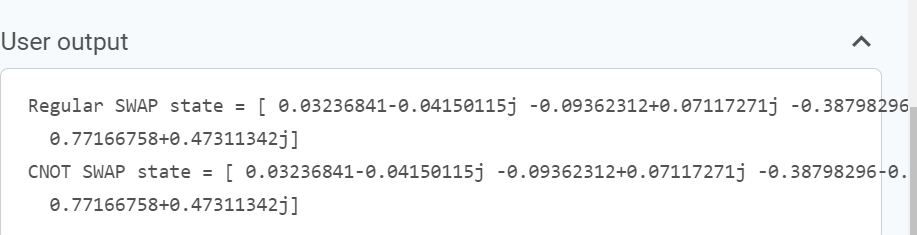

## Learnt about the SWAP gate and how the same can be implemented using a set of CNOT gates

# Codercise I.13.3

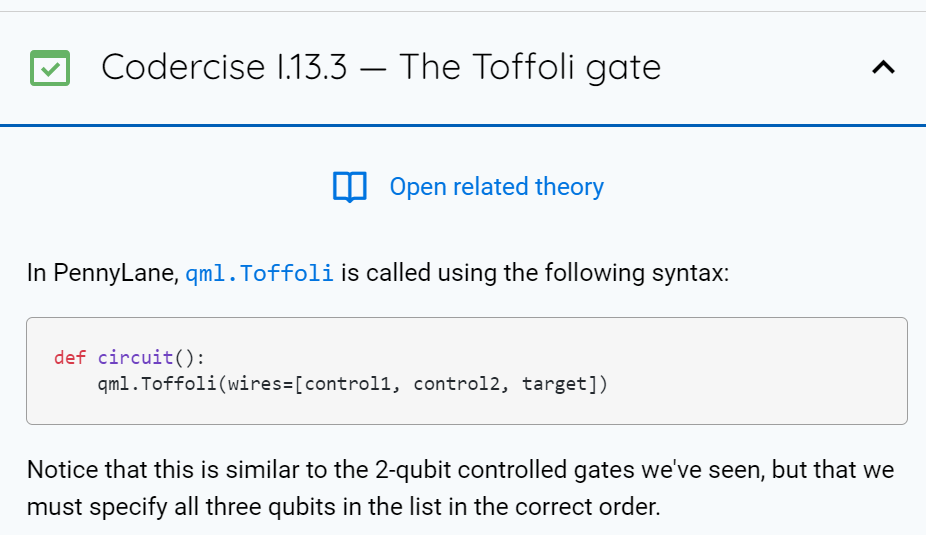

In [8]:
dev = qml.device("default.qubit", wires=3)

# Prepare first qubit in |1>, and arbitrary states on the second two qubits
phi, theta, omega = 1.2, 2.3, 3.4


# A helper function just so you can visualize the initial state
# before the controlled SWAP occurs.
@qml.qnode(dev)
def no_swap(phi, theta, omega):
    prepare_states(phi, theta, omega)
    return qml.state()


@qml.qnode(dev)
def controlled_swap(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    ##################

    # PERFORM A CONTROLLED SWAP USING A SEQUENCE OF TOFFOLIS
    qml.Toffoli(wires=[0,1,2])
    qml.Toffoli(wires=[0,2,1])
    qml.Toffoli(wires=[0,1,2])

    return qml.state()


print(no_swap(phi, theta, omega))
print(controlled_swap(phi, theta, omega))

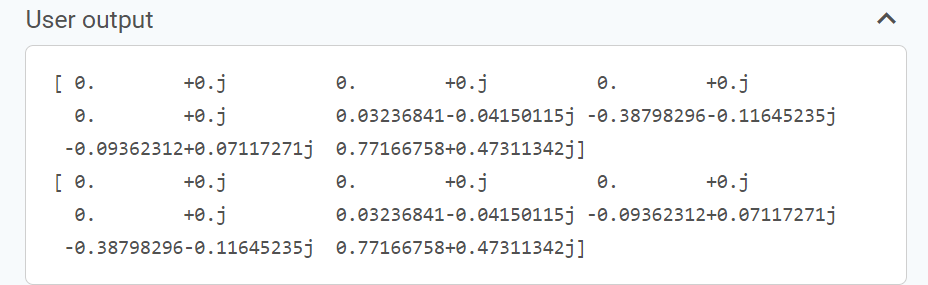

## Learnt about the Tofolli gate and use the same to make a controlled SWAP operation

# Codercise I.13.4

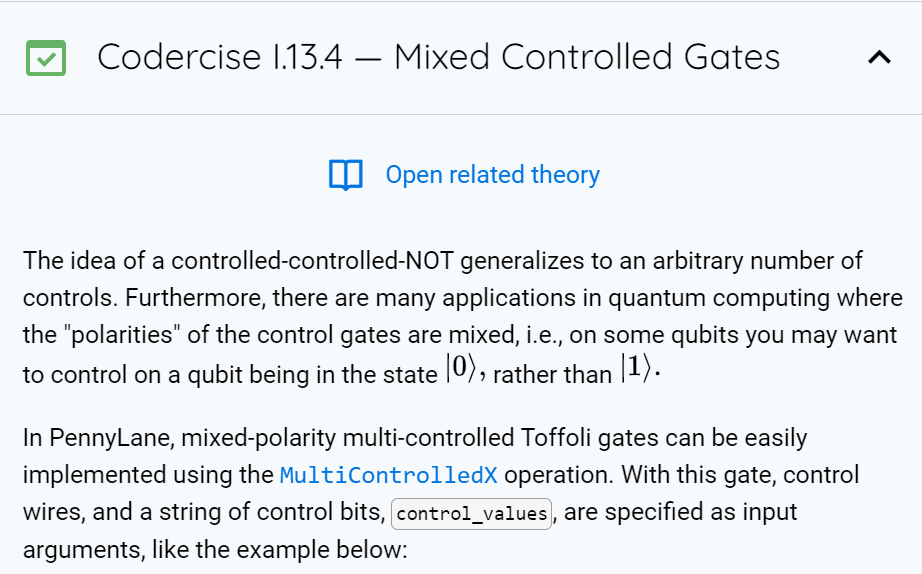

In [9]:
dev = qml.device("default.qubit", wires=4)


@qml.qnode(dev)
def four_qubit_mcx():
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT ABOVE USING A 4-QUBIT MULTI-CONTROLLED X
    controls = [0, 1, 2]
    target = 3

    # Apply the multi-controlled X gate
    for i in controls:
        qml.Hadamard(i)
    qml.MultiControlledX(control_wires=controls, wires=target,control_values="001")
    return qml.state()


print(four_qubit_mcx())


[0.35355339+0.j 0.        +0.j 0.        +0.j 0.35355339+0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j]


/usr/local/lib/python3.10/dist-packages/pennylane/ops/op_math/controlled_ops.py:1071: PennyLaneDeprecationWarning: Specifying control values using a bitstring is deprecated, and will not be supported in future releases, Use a list of booleans or integers instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pennylane/ops/op_math/controlled_ops.py:1077: UserWarning: The control_wires keyword for MultiControlledX is deprecated, and will be removed soon. Use wires = (*control_wires, target_wire) instead.
  warnings.warn(


## Learnt how to use the MultiControlledX gate

# Codercise I.13.5

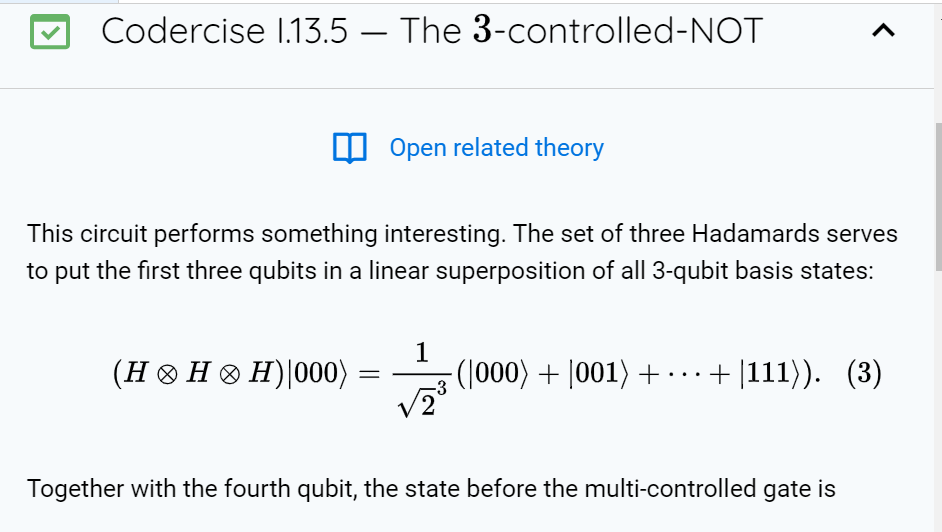

In [10]:
# Wires 0, 1, 2 are the control qubits
# Wire 3 is the auxiliary qubit
# Wire 4 is the target
dev = qml.device("default.qubit", wires=5)


@qml.qnode(dev)
def four_qubit_mcx_only_tofs():
    # We will initialize the control qubits in state |1> so you can see
    # how the output state gets changed.
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    qml.PauliX(wires=2)

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT A 3-CONTROLLED NOT WITH TOFFOLIS
    qml.Toffoli(wires=[0,1,3])
    qml.Toffoli(wires=[2,3,4])
    qml.Toffoli(wires=[0,1,3])

    return qml.state()


# print(four_qubit_mcx_only_tofs())

## Learnt how to apply the three controlled not gates using the Toffoli Gates